# Data Exploration

# 1. Imports

## 1.1 Packages

In [48]:
import os
import pandas as pd
import sys

import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
sys.path.append("../src/")
from prepare_data import set_type

## 1.2 Options

In [50]:
path_data = '../data/raw/'

## 1.3 Datasets

In [51]:
df = pd.read_csv(os.path.join(path_data, "dataset.gz"), sep=";")
df.sample(5)

,Date,Fourni,Ventes,id
17782,2020-08-10,3.0,2.0,-5437387709038814178
29287,2021-01-10,26.0,16.0,8566802626245003202
23060,2020-10-18,35.0,16.0,-5101409780419083249
38536,2021-05-28,22.0,18.0,5218656160002569335
58929,2022-04-01,5.0,4.0,3847030529972014414


# 2. Analyze

In [52]:
df = set_type(df, feat_date="Date")

## 2.1 Overall analysis

In [53]:
print("Size of the dataset", df.shape)

Size of the dataset (83351, 4)


In [54]:
# Description of the dataset
df.describe()

,Fourni,Ventes,id
count,83351.000000,83351.000000,8.335100e+04
mean,15.128697,10.173243,-2.993431e+17
std,14.890796,12.016993,5.908830e+18
min,1.000000,0.000000,-9.168131e+18
25%,5.000000,2.000000,-5.883852e+18
50%,10.000000,6.000000,-6.770789e+17
75%,20.000000,14.000000,5.218656e+18
max,250.000000,227.000000,9.170533e+18


In [55]:
# Number of unique values
for feat in df.columns:
    print(f'Number of unique values for feature {feat}:', df[feat].nunique())

Number of unique values for feature Date: 1192
Number of unique values for feature Fourni: 135
Number of unique values for feature Ventes: 129
Number of unique values for feature id: 100


In [56]:
# Check the percentage of NaNs
df.isna().sum() / len(df)

Date      0.0
Fourni    0.0
Ventes    0.0
id        0.0
dtype: float64

## 2.2 Dates

In [57]:
# Check the period of the dataset
df["Date"].describe(datetime_is_numeric=True)

count                            83351
mean     2021-07-27 00:11:56.276949248
min                2020-01-02 00:00:00
25%                2020-09-20 00:00:00
50%                2021-07-14 00:00:00
75%                2022-05-26 00:00:00
max                2023-04-17 00:00:00
Name: Date, dtype: object

In [71]:
print("Number of unique dates:", df["Date"].nunique())

Number of unique dates: 1192


In [ ]:
df[df["id"] == -8929187383922749181].head(20)

,Date,Fourni,Ventes,id
1,2020-01-02,8.0,1.0,-8929187383922749181
101,2020-01-03,12.0,6.0,-8929187383922749181
199,2020-01-04,26.0,12.0,-8929187383922749181
296,2020-01-05,12.0,5.0,-8929187383922749181
1705,2020-01-21,12.0,9.0,-8929187383922749181
1797,2020-01-22,9.0,7.0,-8929187383922749181
1883,2020-01-23,8.0,2.0,-8929187383922749181
1978,2020-01-24,12.0,6.0,-8929187383922749181
2072,2020-01-25,26.0,18.0,-8929187383922749181
2165,2020-01-26,12.0,0.0,-8929187383922749181


## 2.3 Analyze by Id

Ids might represent each specific selling points. So we analyze the spread of the data by selling point

In [58]:
df_id = df["id"].value_counts().reset_index(drop=False)
df_id.columns=["id", "count"]
df_id["id"] = df_id["id"].astype(str)

<AxesSubplot: xlabel='count', ylabel='id'>

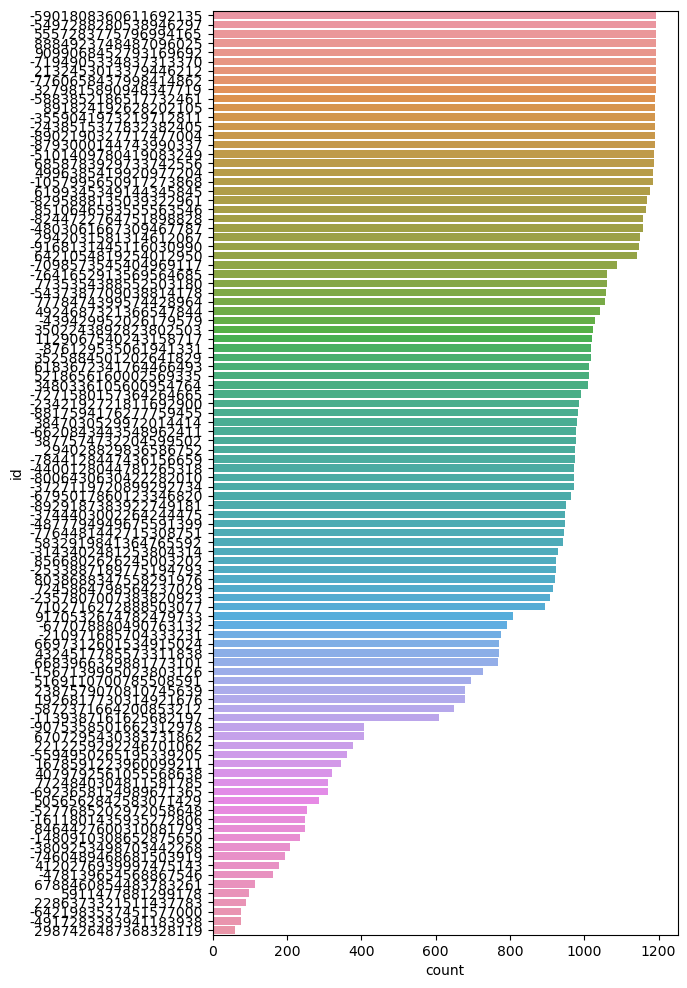

In [60]:
_, ax = plt.subplots(figsize=(6, 12))
sns.barplot(data=df_id, x='count', y='id', ax=ax)

As we can see, some point of sales are less represented in the dataset than others. We check the dates available in the data to understand why:

In [69]:
id_less = df_id.iloc[-1]["id"]
df[df["id"] == int(id_less)]

,Date,Fourni,Ventes,id
46,2020-01-02,9.0,4.0,2987426487368328119
145,2020-01-03,10.0,4.0,2987426487368328119
242,2020-01-04,10.0,2.0,2987426487368328119
327,2020-01-05,13.0,5.0,2987426487368328119
410,2020-01-06,10.0,5.0,2987426487368328119
500,2020-01-07,10.0,6.0,2987426487368328119
589,2020-01-08,11.0,4.0,2987426487368328119
679,2020-01-09,9.0,3.0,2987426487368328119
776,2020-01-10,10.0,3.0,2987426487368328119
871,2020-01-11,10.0,5.0,2987426487368328119


As we can see, this point of sell just before covid and never opened after. On the contrary, some ids have 1192 rows which correspond to the number of unique dates so they were opened during the all period covered by the dataset.